In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1 ###

In [2]:
class GamblerEnvironment:
    def __init__(self, goal=100, prob_head=0.4, gamma=1.0):
        self.goal = goal
        self.prob_head = prob_head
        self.gamma = gamma
        self.states = np.arange(goal + 1)
        self.state_values = np.zeros(goal + 1)
        self.state_values[goal] = 1 #Value for winning state
        self.policy = np.zeros(goal + 1)
        
    def possible_bets(self, state):
        
        '''Get possible stakes'''
        
        return range(1, min(state, self.goal - state) + 1)
    

In [3]:
def reward_f(final_capital, goal):
    
    '''Define reward'''
    
    if final_capital >= goal:  
        return max(final_capital - (goal - 1), 0)
    
    else:
        return 0

In [4]:
def bellman_upd(env, state):
    
    '''Bellman update for a given state'''
    
    value_best_bet = 0
    best_bet = 0
    
    for stake in env.possible_bets(state):
        win_capital = state + stake
        lose_capital = state - stake
        
        # Calculate reward 
        
        win_value = (env.prob_head * (reward_f(win_capital, env.goal) + env.gamma * env.state_values[win_capital]))
        
        lose_value = ((1 - env.prob_head) * (reward_f(lose_capital, env.goal) + env.gamma * env.state_values[lose_capital]))
        
        action_value = win_value + lose_value
        
        if action_value > value_best_bet:
            value_best_bet = action_value
            best_bet = stake
        
    return value_best_bet, best_bet

In [5]:
def value_iteration(env, theta = 1e-9):
    
    '''Value iteration algorithm on the gambler problem'''
    
    while True:
        delta = 0
        for state in env.states[1:env.goal]:
            value_best_bet, best_bet = bellman_upd(env, state)
            delta = max(delta, np.abs(env.state_values[state] - value_best_bet))
            env.state_values[state] = value_best_bet
            env.policy[state] = best_bet

        if delta < theta:
            break # Stop if the changes are smaller than theta


In [6]:
def policy_iteration(env, theta = 1e-9):
    
    '''Policy iteration algorithm on the gambler problem'''
    
    is_stable_policy = False
    
    while not is_stable_policy:
        
        # Policy Evaluation
        while True:
            delta = 0
            for state in env.states[1:env.goal]:
                previous_value = env.state_values[state]
                value_best_bet, _ = bellman_upd(env, state)
                env.state_values[state] = value_best_bet
                delta = max(delta, np.abs(previous_value - env.state_values[state]))
            
            if delta < theta:
                break # Stop if the changes are smaller than theta
                
        # Policy Improvement
        is_stable_policy = True
        for state in env.states[1:env.goal]:
            _, best_bet = bellman_upd(env, state)
            if best_bet != env.policy[state]:
                is_stable_policy = False
            env.policy[state] = best_bet

    print('Policy Iteration complete')
        

In [7]:
def plots(env, title = " "):
    
    '''Plot the value estimates and optimal policy for the gambler problem'''
    
    plt.figure()
    plt.plot(env.state_values)
    plt.xlabel('Capital')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates {title}')
    plt.show()
    
    plt.figure()
    plt.bar(range(len(env.policy)), env.policy)
    plt.xlabel('Capital')
    plt.ylabel('Stake')
    plt.title(f'Optimal Policy {title}')
    plt.show()

In [8]:
# Define values for probability of head and gamma values
values_prob_head = [0.25, 0.55]
values_gamma = [1.0, 0.99, 0.90]

Task 1 for prob_head0.25 and gamma=1.0


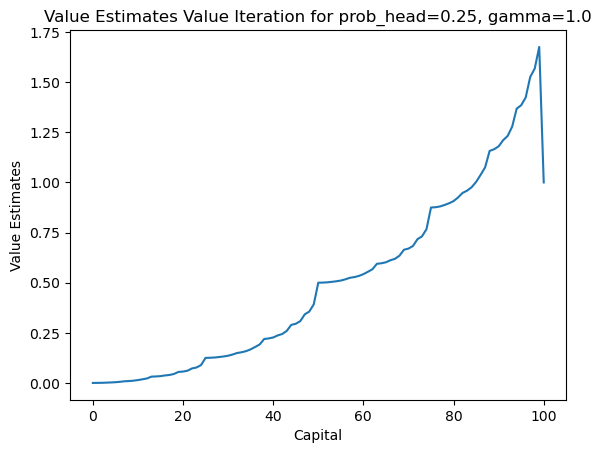

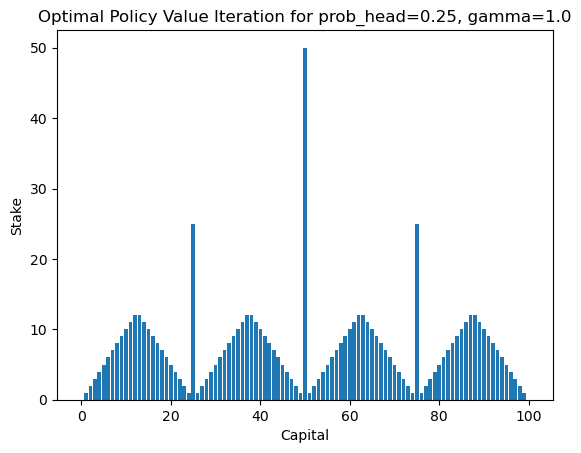

Policy Iteration complete


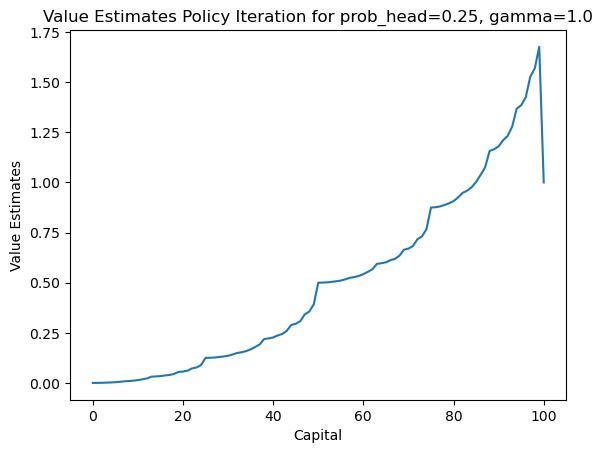

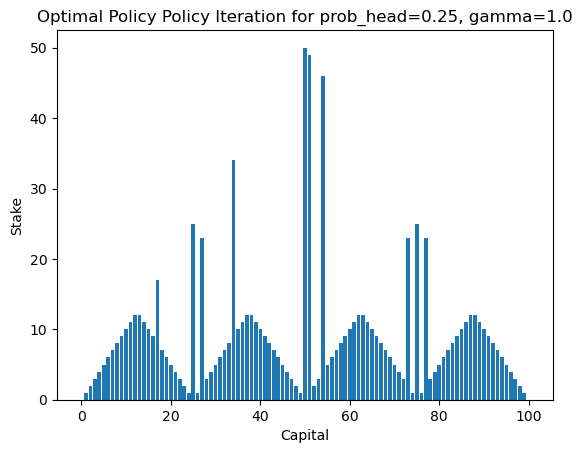

Task 1 for prob_head0.25 and gamma=0.99


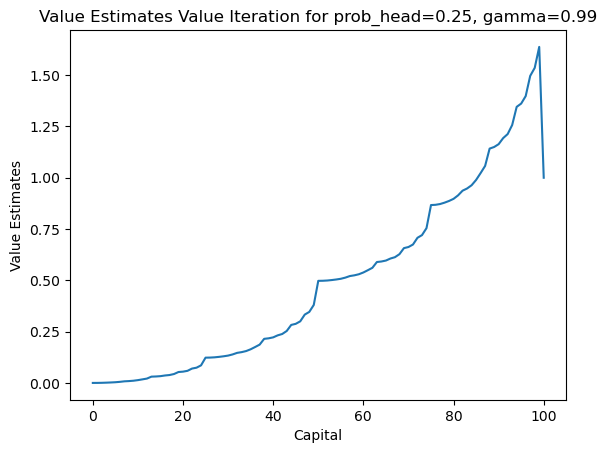

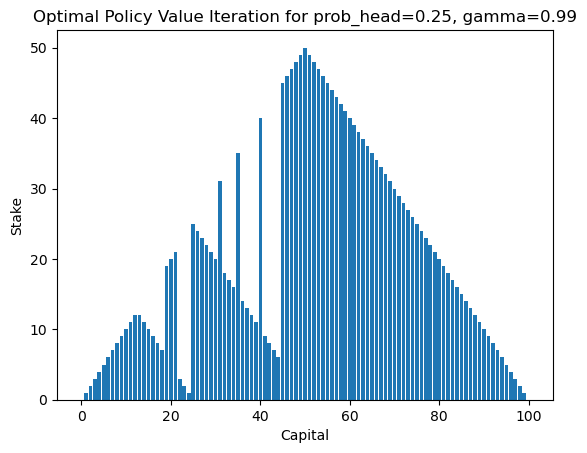

Policy Iteration complete


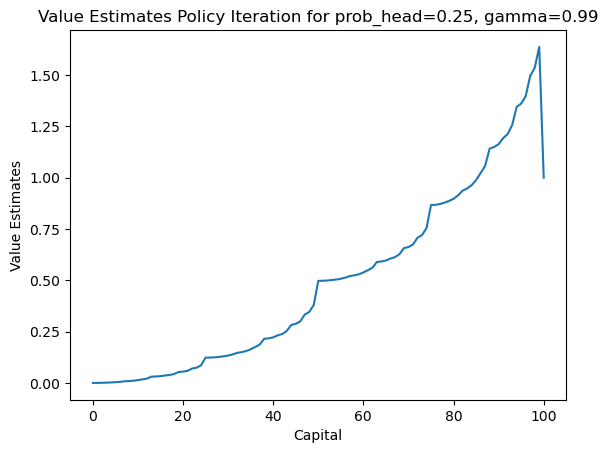

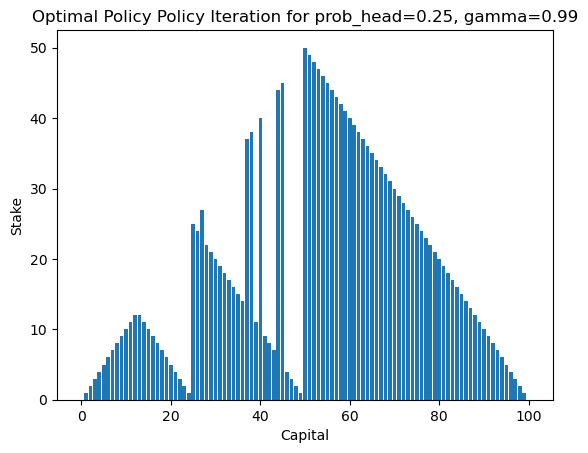

Task 1 for prob_head0.25 and gamma=0.9


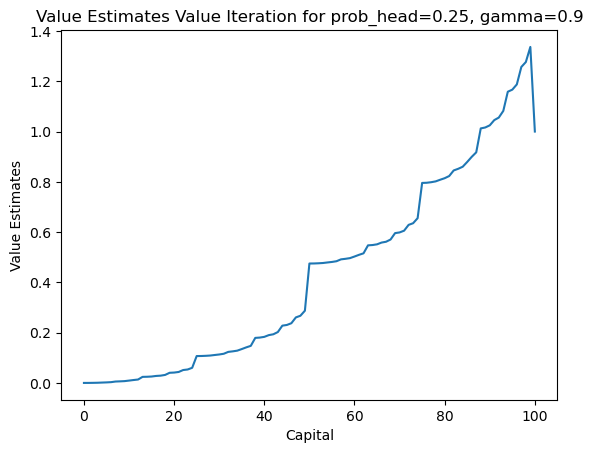

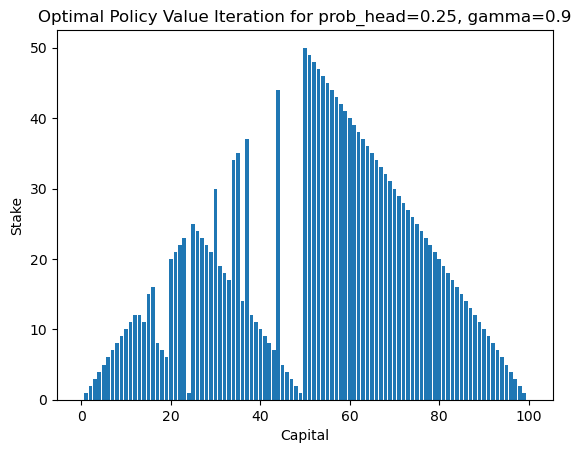

Policy Iteration complete


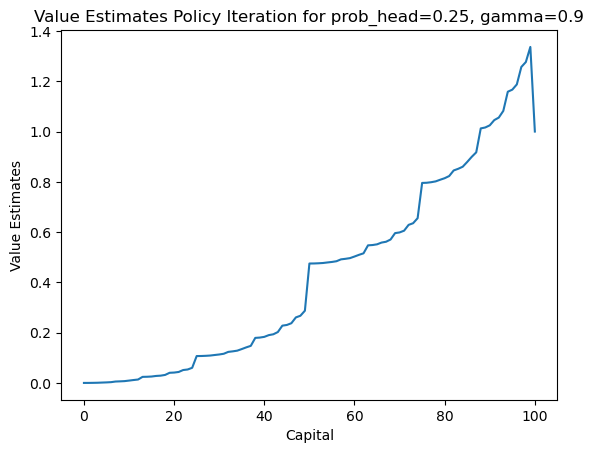

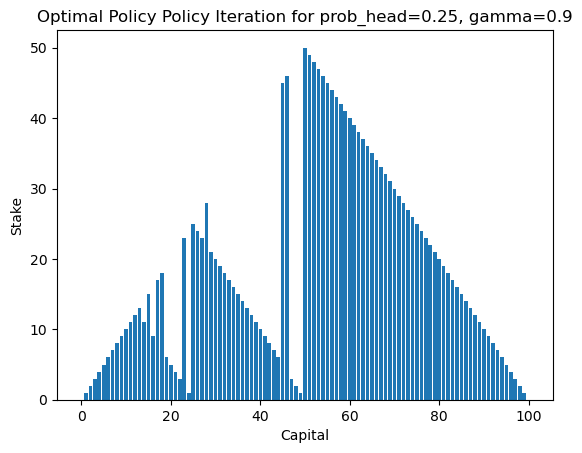

Task 1 for prob_head0.55 and gamma=1.0


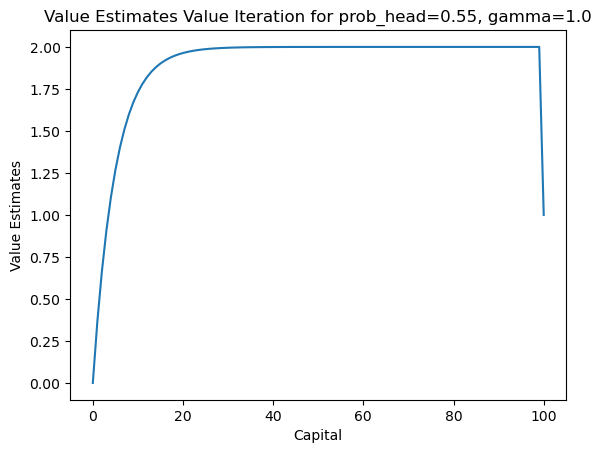

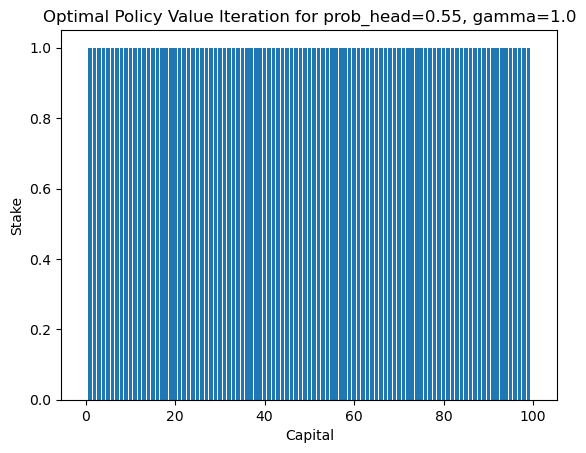

Policy Iteration complete


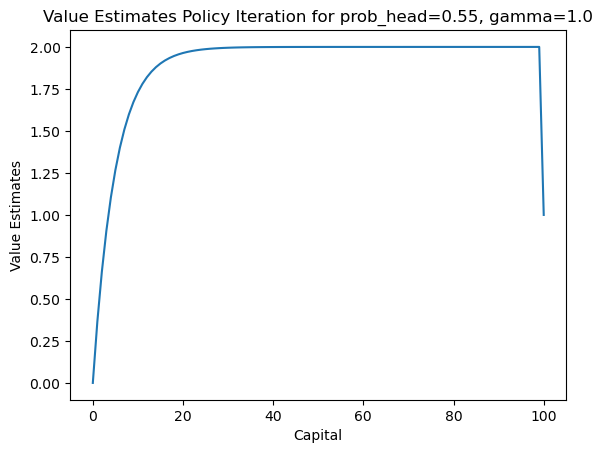

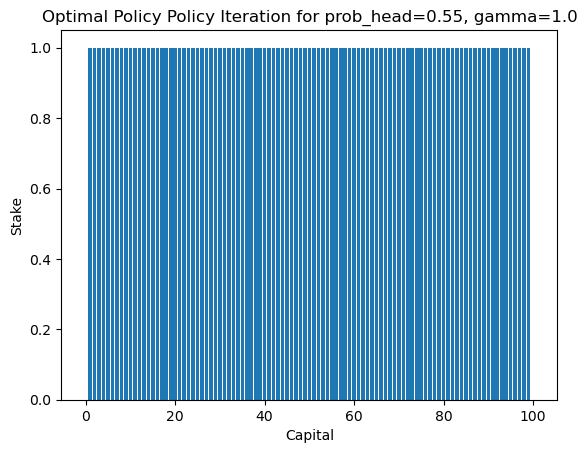

Task 1 for prob_head0.55 and gamma=0.99


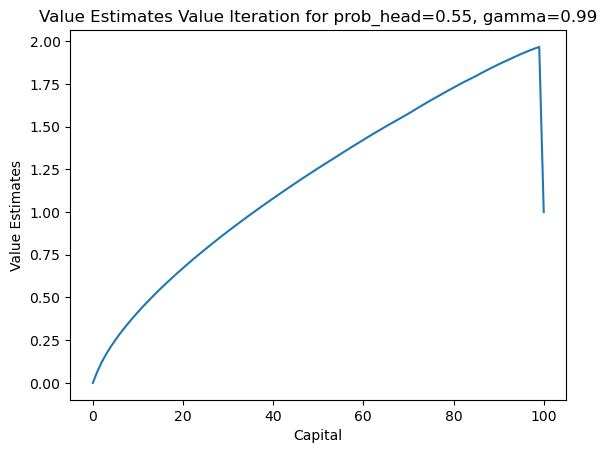

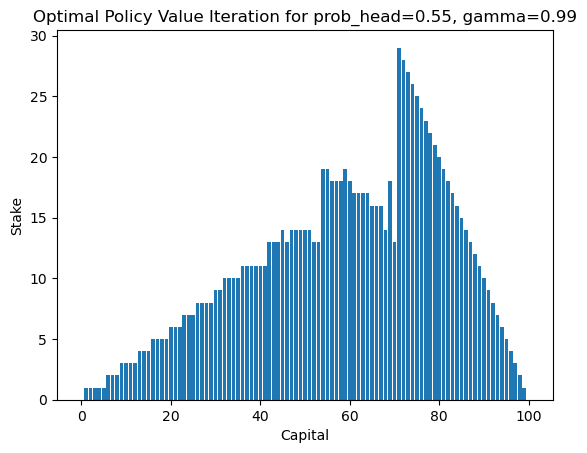

Policy Iteration complete


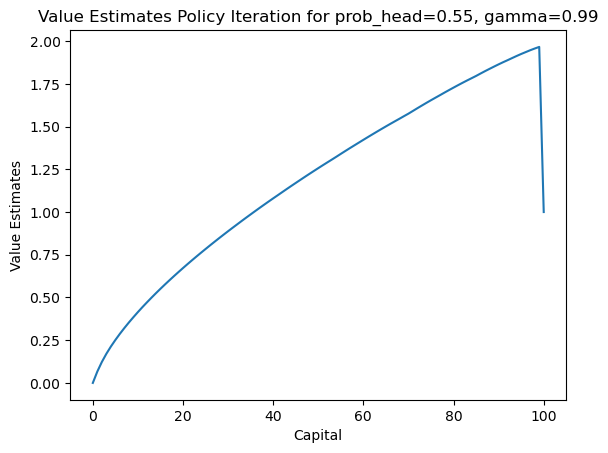

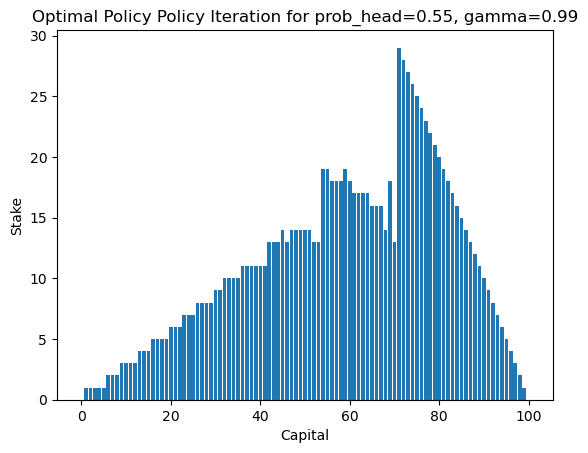

Task 1 for prob_head0.55 and gamma=0.9


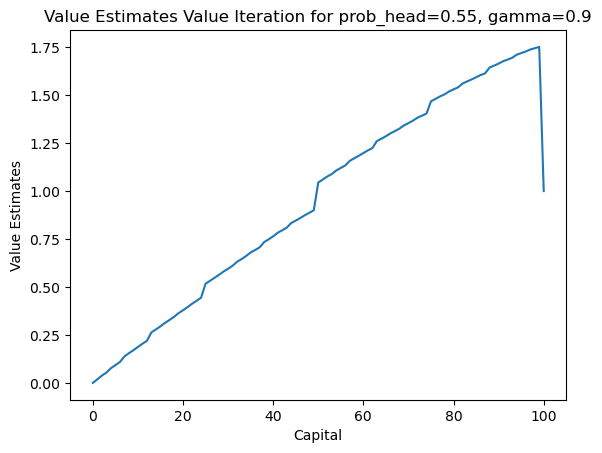

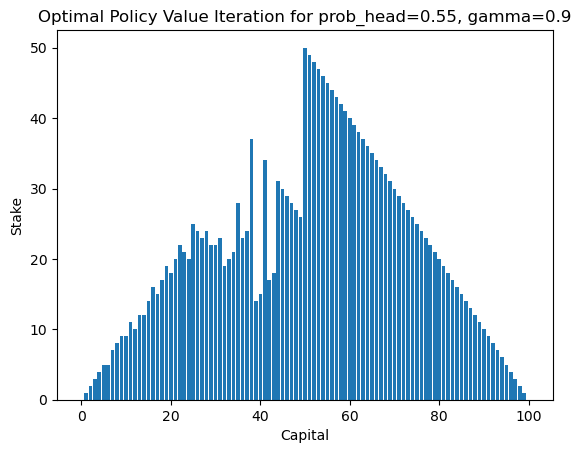

Policy Iteration complete


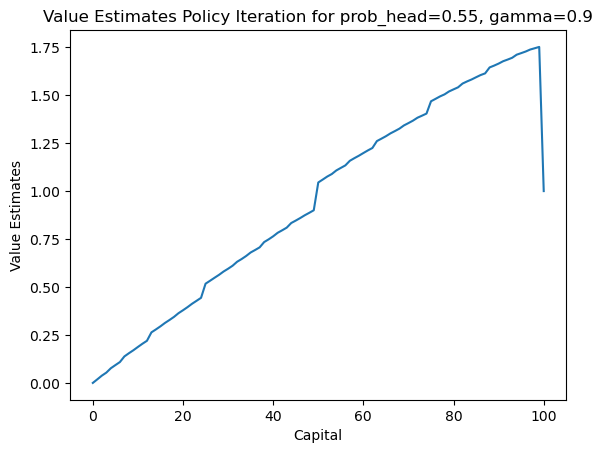

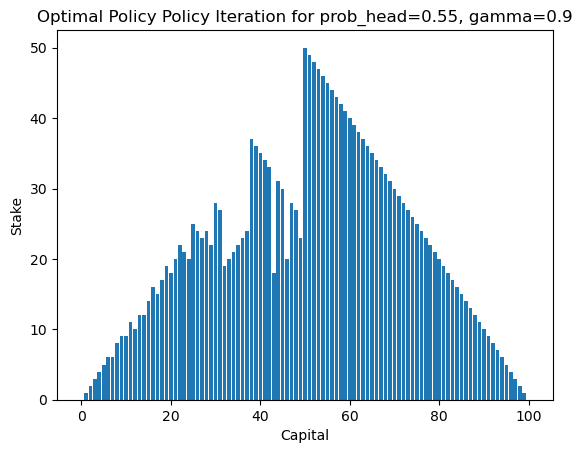

In [9]:
for prob_head in values_prob_head:
    for gamma in values_gamma:
        print(f'Task 1 for prob_head{prob_head} and gamma={gamma}')
        env = GamblerEnvironment(prob_head = prob_head, gamma = gamma)
        
        # Value Iteration
        value_iteration(env)
        plots(env, f'Value Iteration for prob_head={prob_head}, gamma={gamma}')
        
        # Reset environment for Policy Iteration
        env = GamblerEnvironment(prob_head = prob_head, gamma = gamma)
        policy_iteration(env)
        plots(env, f'Policy Iteration for prob_head={prob_head}, gamma={gamma}')

### Task 2 ###

In [10]:
class GamblerEnvironment2:
    def __init__(self, goal=100, prob_head=0.4, gamma=1.0, max_value_cap=100):
        self.goal = goal
        self.prob_head = prob_head
        self.gamma = gamma
        self.max_value_cap = max_value_cap # Cap for state value
        self.states = np.arange(goal + 1)
        self.state_values = np.zeros(goal + 1)
        self.state_values[goal] = 1  # Value for winning state
        self.policy = np.zeros(goal + 1)
        
    def possible_bets(self, state):
        '''Get possible stakes up to the current capital'''
        return range(1, state + 1)


In [11]:
def reward_f2(final_capital, goal, max_reward_cap=100):
    '''Define reward based on the final capital reaching or exceeding the goal'''
    if final_capital >= goal:
        reward = final_capital - (goal - 1)
        # Stabilize reward to avoid overflow
        return min(reward, max_reward_cap)
    else:
        return 0


In [12]:
def bellman_upd2(env, state):
    '''Bellman update with the "North" head rule for reward calculation'''
    value_best_bet = 0
    best_bet = 0
    
    for stake in env.possible_bets(state):
        # Calculate final capital if the bet wins
        win_capital = state + stake
        lose_capital = state - stake
        
        # Regular head outcome (reward with a capped value for state values)
        regular_win_value = env.prob_head * (reward_f2(win_capital, env.goal) + env.gamma * env.state_values[min(win_capital, env.goal)])
        
        # North head outcome (double winnings, with capped value for state values)
        north_win_capital = state + 2 * stake
        north_win_value = (env.prob_head / 8) * (reward_f2(north_win_capital, env.goal) + env.gamma * env.state_values[min(north_win_capital, env.goal)])
        
        # Total win value (with 1/8 chance of a North head)
        win_value = regular_win_value + north_win_value
        
        # Lose outcome
        lose_value = (1 - env.prob_head) * (reward_f2(lose_capital, env.goal) + env.gamma * env.state_values[lose_capital])
        
        action_value = win_value + lose_value
        
        
        
        
        if action_value > value_best_bet:
            value_best_bet = action_value
            best_bet = stake
            
    # Apply cap to the calculated best bet value
    value_best_bet = min(value_best_bet, env.max_value_cap)
    
        
    return value_best_bet, best_bet


In [13]:
def value_iteration(env, theta=1e-9):
    '''Value iteration algorithm on the extended gambler problem'''
    while True:
        delta = 0
        for state in env.states[1:env.goal]:
            value_best_bet, best_bet = bellman_upd2(env, state)
            delta = max(delta, np.abs(env.state_values[state] - value_best_bet))
            env.state_values[state] = value_best_bet
            env.policy[state] = best_bet
        if delta < theta:
            break


In [14]:
def policy_iteration(env, theta=1e-9):
    '''Policy iteration algorithm on the extended gambler problem'''
    is_stable_policy = False
    
    while not is_stable_policy:
        # Policy Evaluation
        while True:
            delta = 0
            for state in env.states[1:env.goal]:
                previous_value = env.state_values[state]
                env.state_values[state], _ = bellman_upd2(env, state)
                delta = max(delta, np.abs(previous_value - env.state_values[state]))
            if delta < theta:
                break
                
        # Policy Improvement
        is_stable_policy = True
        for state in env.states[1:env.goal]:
            _, best_bet = bellman_upd2(env, state)
            if best_bet != env.policy[state]:
                is_stable_policy = False
            env.policy[state] = best_bet
    print('Policy Iteration complete')


In [15]:
def plots(env, title=" "):
    '''Plot the value estimates and optimal policy for the extended gambler problem'''
    plt.figure()
    plt.plot(env.state_values)
    plt.xlabel('Capital')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates {title}')
    plt.show()
    
    plt.figure()
    plt.bar(range(len(env.policy)), env.policy)
    plt.xlabel('Capital')
    plt.ylabel('Stake')
    plt.title(f'Optimal Policy {title}')
    plt.show()


In [16]:
# Define values for probability of head and gamma values
values_prob_head = [0.25, 0.55]
values_gamma = [1.0, 0.99, 0.90]


Task 2 for prob_head=0.25 and gamma=1.0


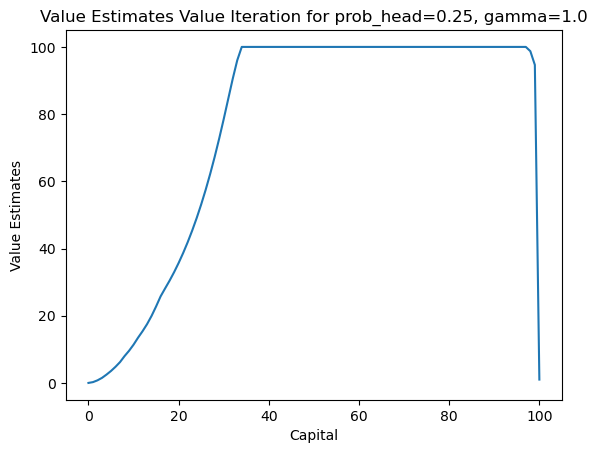

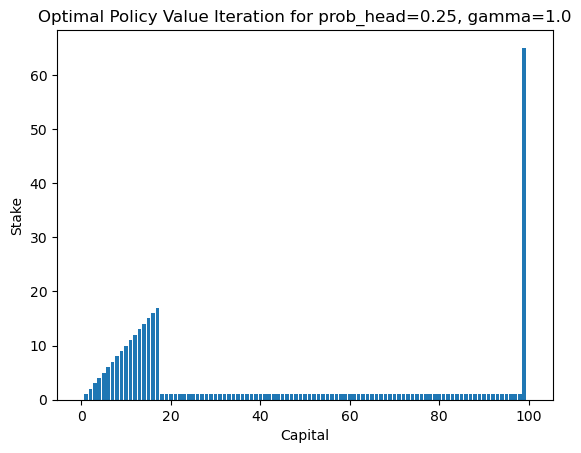

Policy Iteration complete


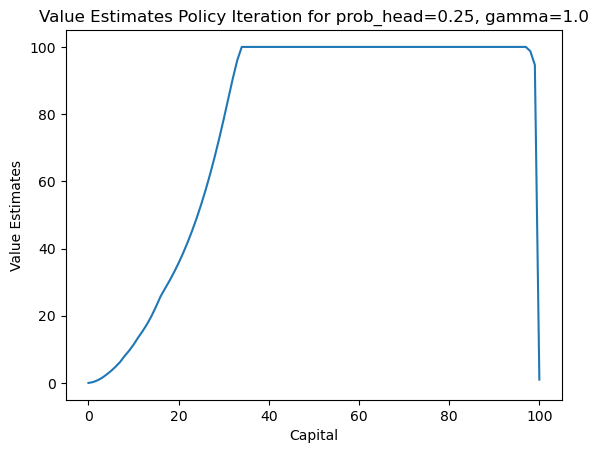

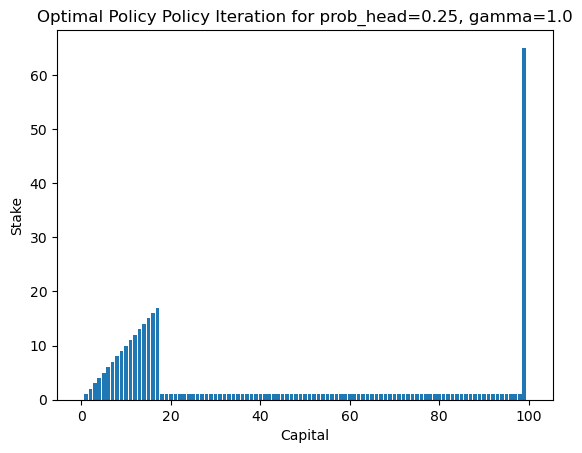

Task 2 for prob_head=0.25 and gamma=0.99


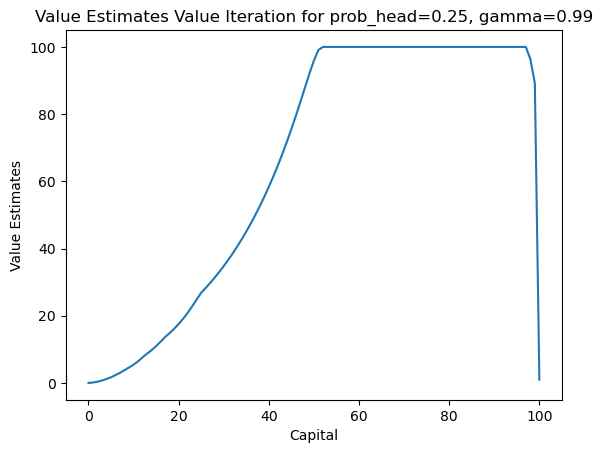

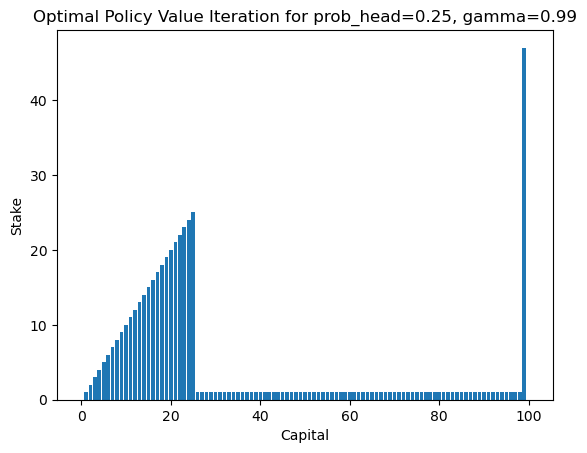

Policy Iteration complete


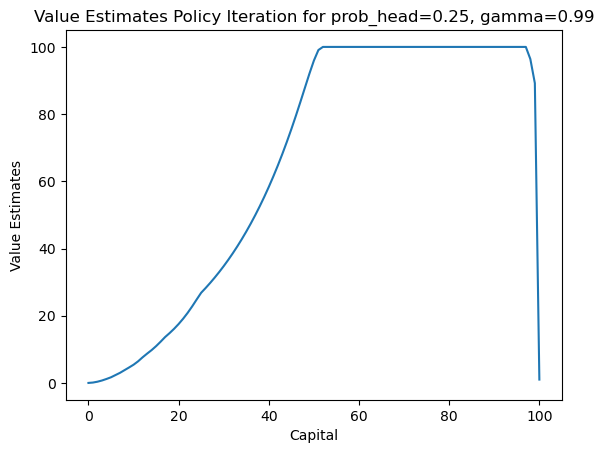

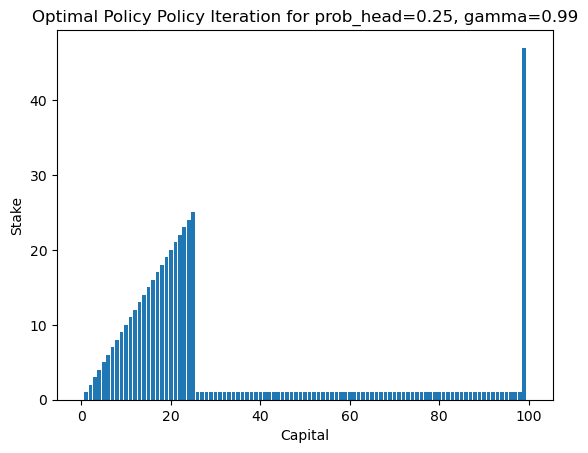

Task 2 for prob_head=0.25 and gamma=0.9


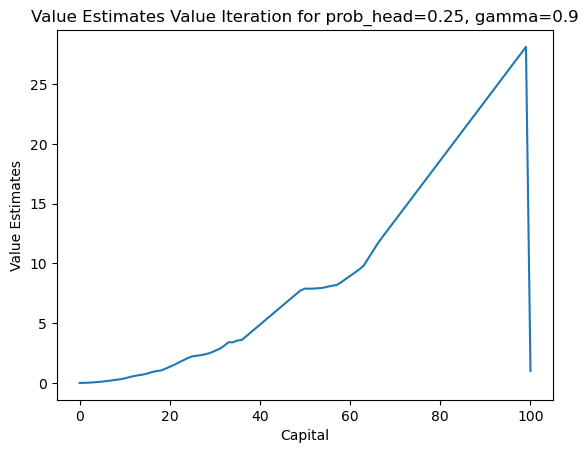

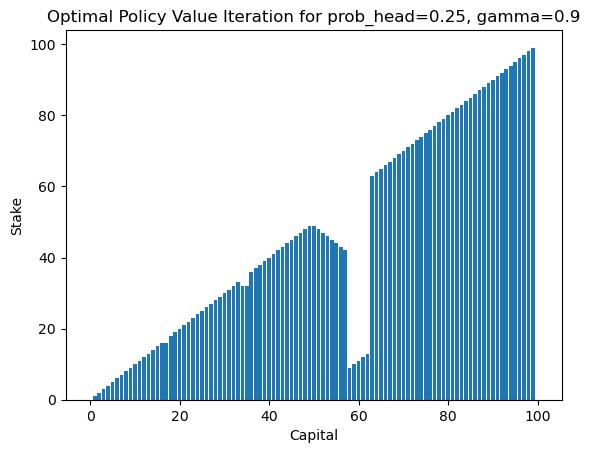

Policy Iteration complete


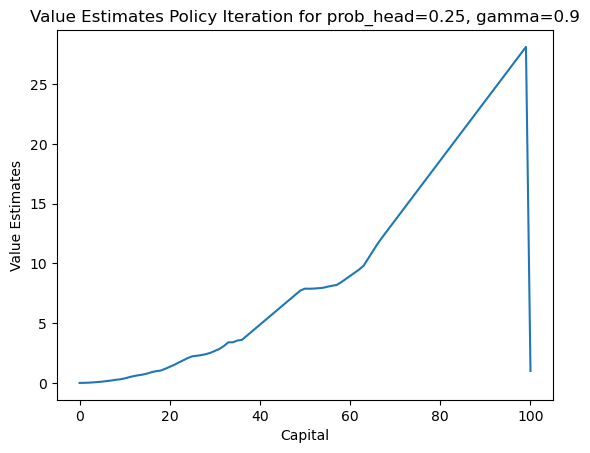

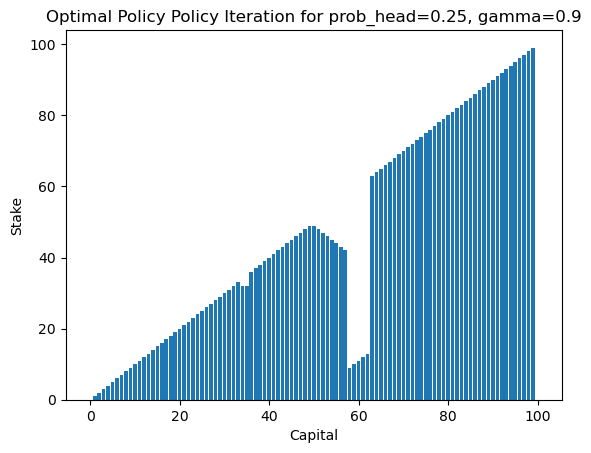

Task 2 for prob_head=0.55 and gamma=1.0


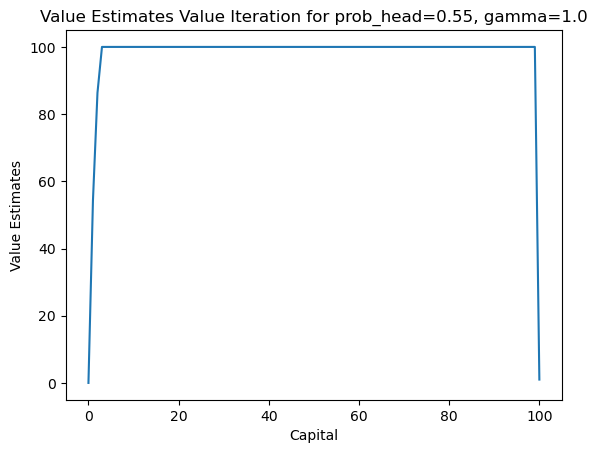

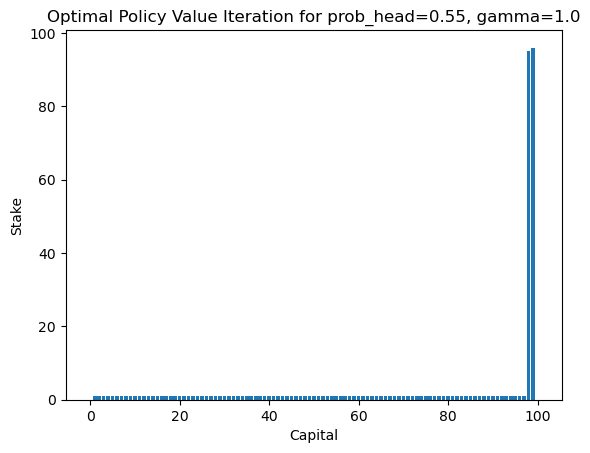

Policy Iteration complete


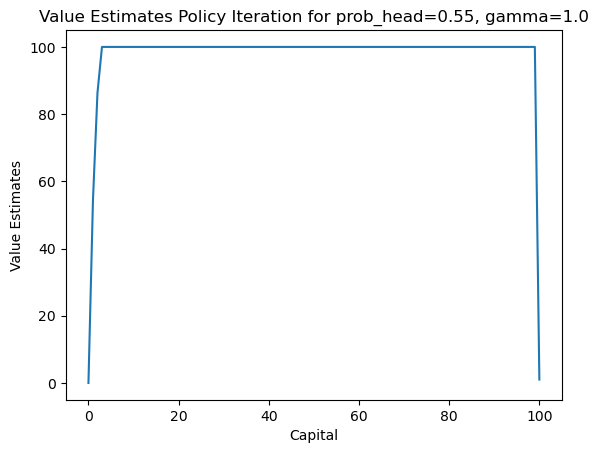

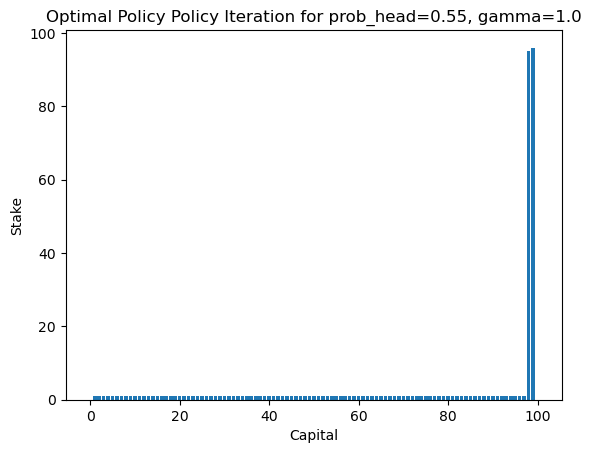

Task 2 for prob_head=0.55 and gamma=0.99


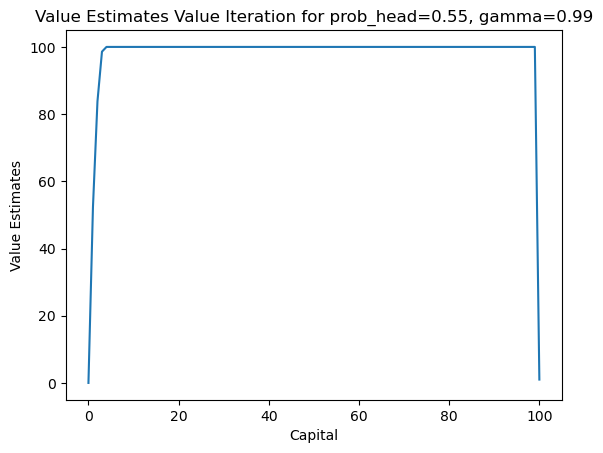

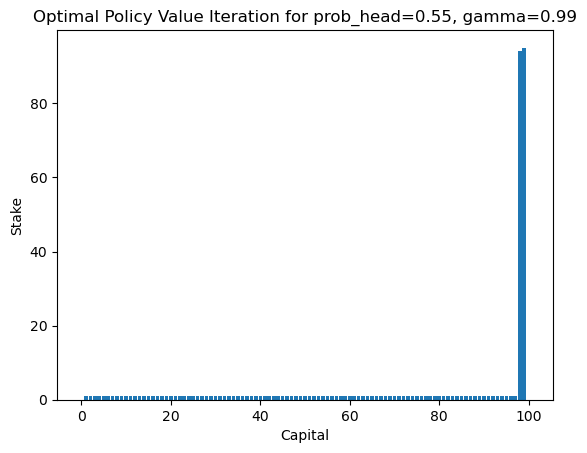

Policy Iteration complete


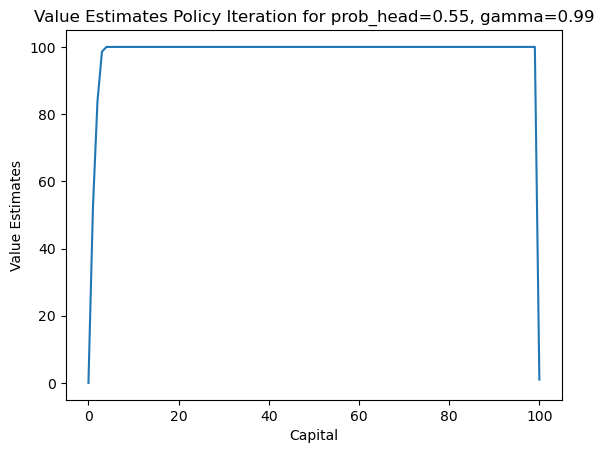

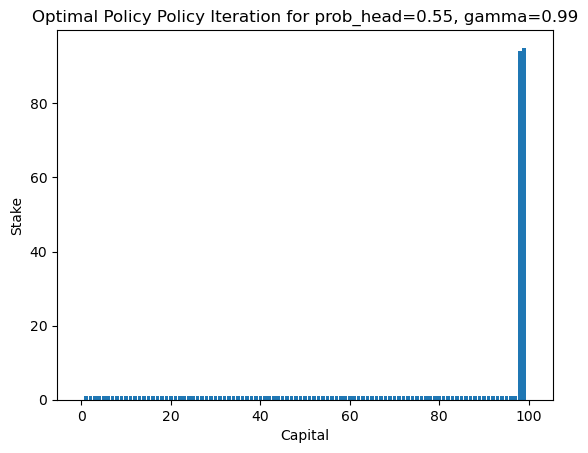

Task 2 for prob_head=0.55 and gamma=0.9


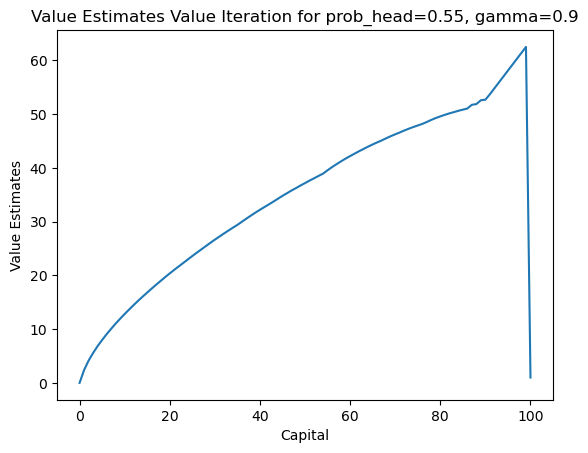

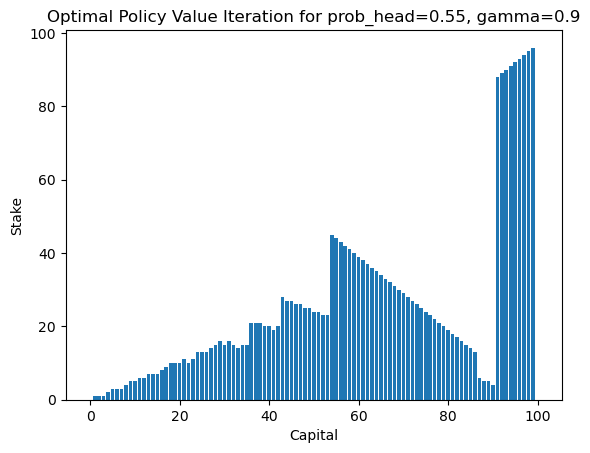

Policy Iteration complete


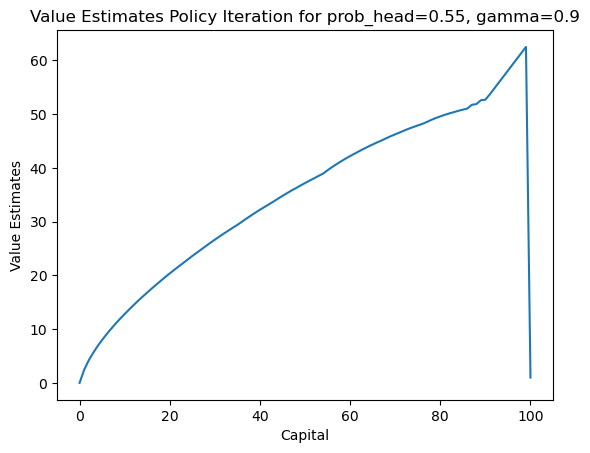

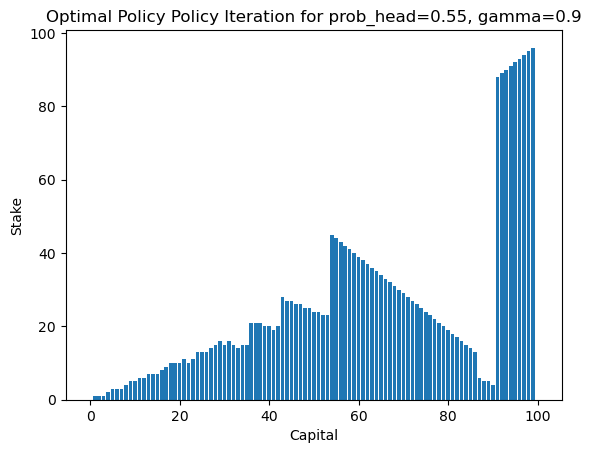

In [17]:
for prob_head in values_prob_head:
    for gamma in values_gamma:
        print(f'Task 2 for prob_head={prob_head} and gamma={gamma}')
        env = GamblerEnvironment2(prob_head=prob_head, gamma=gamma)
        
        # Value Iteration
        value_iteration(env)
        plots(env, f'Value Iteration for prob_head={prob_head}, gamma={gamma}')
        
        # Reset environment for Policy Iteration
        env = GamblerEnvironment2(prob_head=prob_head, gamma=gamma)
        policy_iteration(env)
        plots(env, f'Policy Iteration for prob_head={prob_head}, gamma={gamma}')

